In [237]:
import pandas as pd
import numpy as np

import missingno

import matplotlib.pyplot as plt
import seaborn as sns

# for min_max scaling
from mlxtend.preprocessing import minmax_scaling

In [238]:
# Read in the titanic file
titanic = pd.read_csv('Titanic.csv')
# Taking a look at the first few rows of the dataset
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [239]:
# Accessing the total number of columns and rows in the dataset
titanic.shape

(891, 12)

## **DEALING WITH MISSING DATA**

Using the "missingno" library, I visualized the missing data in the titanic dataset.

<Axes: >

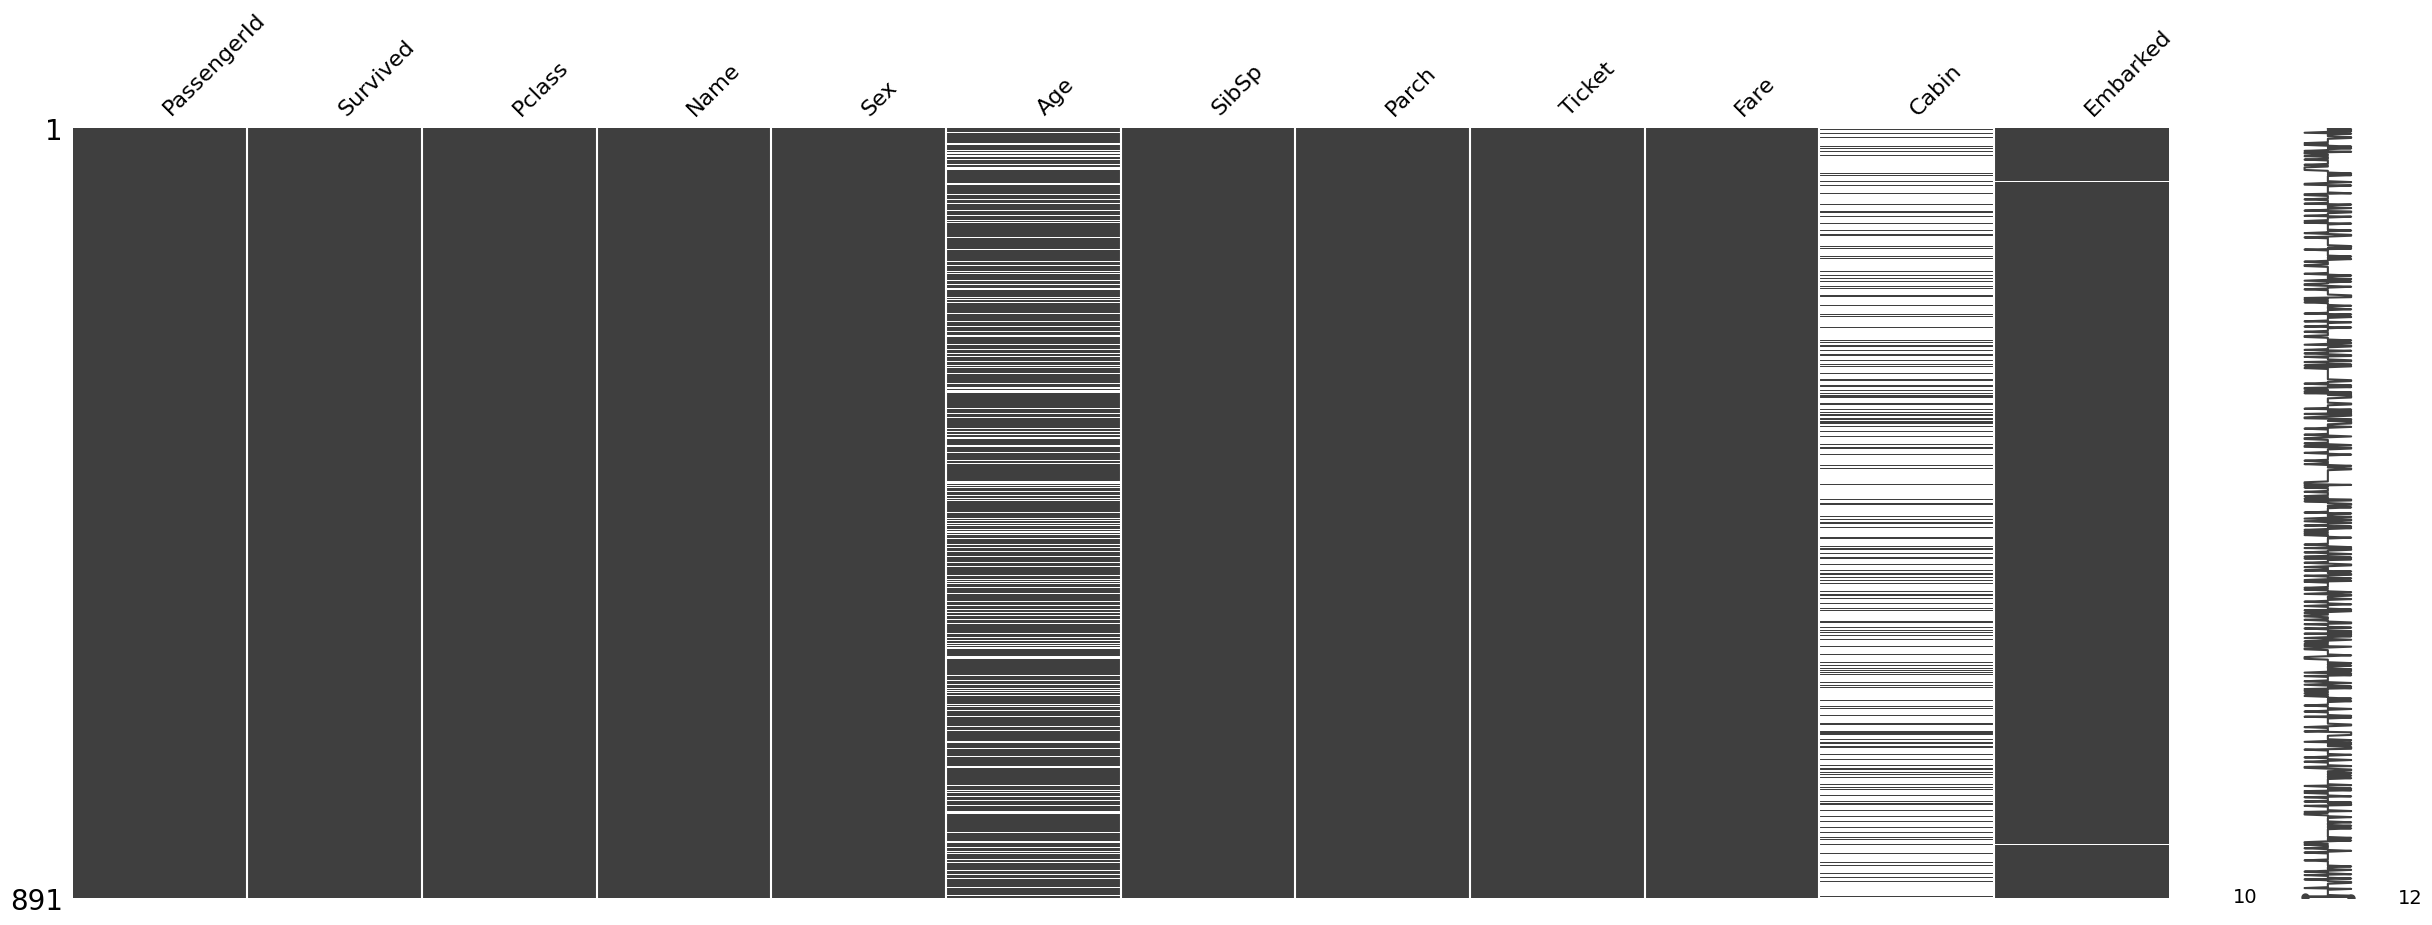

In [240]:
# Graphic representation of the missing values in the dataset
missingno.matrix(titanic, figsize = (30, 10))

Looking at the graphic representation of the titanic dataset, it is evident that the dataset contains enormous missing values. The graphical representation shows that majority of the missing values are in the 'Age' and 'Cabin' columns. 

To clean the dataset, it is best to further acsertain if there are any other missing values by using the 'isnull()' function.
This shows how many missing values there are in each column:


In [241]:
# Number of missing values per  column
missing_values = titanic.isnull().sum()

missing_values[:]

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

The above output shows that the 'Embarked' column has 2 missing values. It also shows the exact number of missing values in the Age and Cabin column, which are 177 and 687 respectively.

For further understanding of how much data is missing in the dataset, it is needful to calculate the percentage of missing values:

In [242]:
# Total number of missing values
num_of_cells = np.product(titanic.shape)
total_cells_missing = missing_values.sum()

# Percentage of data missing
(total_cells_missing/num_of_cells) * 100

8.099513655069211

Approximately 8.1% of the values in the titanic dataset is missing and all of this percentage comes from 3 variables: 'Age', 'Cabin' and 'Embarked'. 
Going back to the previous graphical representation, and looking at the quantity of missing values, It is not a good practice to drop the rows with missing values as this will drastically reduce the total number of rows in the dataset to 183 from an original of 891: doing this would lead to a loss of valuable information and may also result to bias.

Instead of dropping the missing rows in the 'Age' column, due to the above stated reasons, it is best to handle the missing values by predicting them using variables such as Fare, Pclass, SibSp, and Parched.

This is done by building a machine learning model using simple Linear Regression:

In [243]:
# import the sklearn model

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Separate the dataset into two parts: one with known ages and one with missing ages
known_age = titanic[titanic['Age'].notna()]
unknown_age = titanic[titanic['Age'].isna()]

# Select features for predicting missing ages
X_train = known_age[['Fare', 'Pclass', 'SibSp', 'Parch']]
y_train = known_age['Age']
X_test = unknown_age[['Fare', 'Pclass', 'SibSp', 'Parch']]

# Train a simple linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict missing ages
predicted_ages = model.predict(X_test)

# Fill missing ages in the original DataFrame
titanic.loc[titanic['Age'].isna(), 'Age'] = predicted_ages




The 'Cabin' column has a high number of missing values. To ascertain that, There is need to calculate the percentage of missing values in that particular column before determing what to do with it as it's relevance to answering the questions partaining to the task is being questioned.

In [244]:
# Count the number of missing values in the 'Cabin' column

missing_values_in_cabin = titanic['Cabin'].isnull().sum()

# Calculate the total number of rows in the column
total_rows_in_cabin = titanic['Cabin'].shape[0]

# Calculate the percentage of missing values 
percentage_missing = (missing_values_in_cabin / total_rows_in_cabin) * 100

print(f"The percentage of missing values in the 'Cabin' colum is: {percentage_missing}")

The percentage of missing values in the 'Cabin' colum is: 77.10437710437711


The above shows that roughly 77% of the values in the 'Cabin' column is missing, hence it is ideal to drop the column. Further reason is the fact that missing values are too numerous to imput.

The 'Embarked' column has only 2 values missing. It is appropriate to replace the missing value with 'the mode of the column'

In [245]:
# Drop the Cabin column
titanic.drop(columns=['Cabin'], inplace=True)
titanic

# Replacing the missing values in the 'Embarked' column witht the mode of the column

mode_age = titanic['Embarked'].mode()
mode_age

# Replacing the missing values with the mode_age
titanic['Embarked'].fillna(mode_age, inplace=True)

# Also drop the PassengerId column as it isnt of much relevance to the analysis
titanic.drop(columns=['PassengerId'], inplace=True)

C:\Users\onona\AppData\Local\Temp\ipykernel_24328\1330656710.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['Embarked'].fillna(mode_age, inplace=True)



## **BASED ON THE ABOVE, ALL MISSING DATA HAS BEEN APPROPRIATELY DEALTH WITH**

**Exploring the features of the dataset**

Sex
male      577
female    314
Name: count, dtype: int64


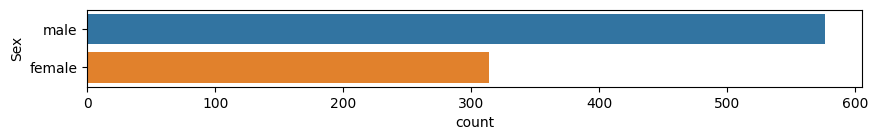

In [246]:
# Gender distribution of the titanic passengers

fig = plt.figure(figsize=(10,1))
sns.countplot(y='Sex', data=titanic)
print(titanic.Sex.value_counts())

Looking at the above representation, it shows that the majority of the titanic passengers were of the male gender, with males being nearly twice the number of females aboard the titanic.

Age
24.000000    30
22.000000    27
18.000000    26
30.000000    25
19.000000    25
             ..
12.000000     1
40.551319     1
22.226317     1
34.764259     1
21.009540     1
Name: count, Length: 171, dtype: int64


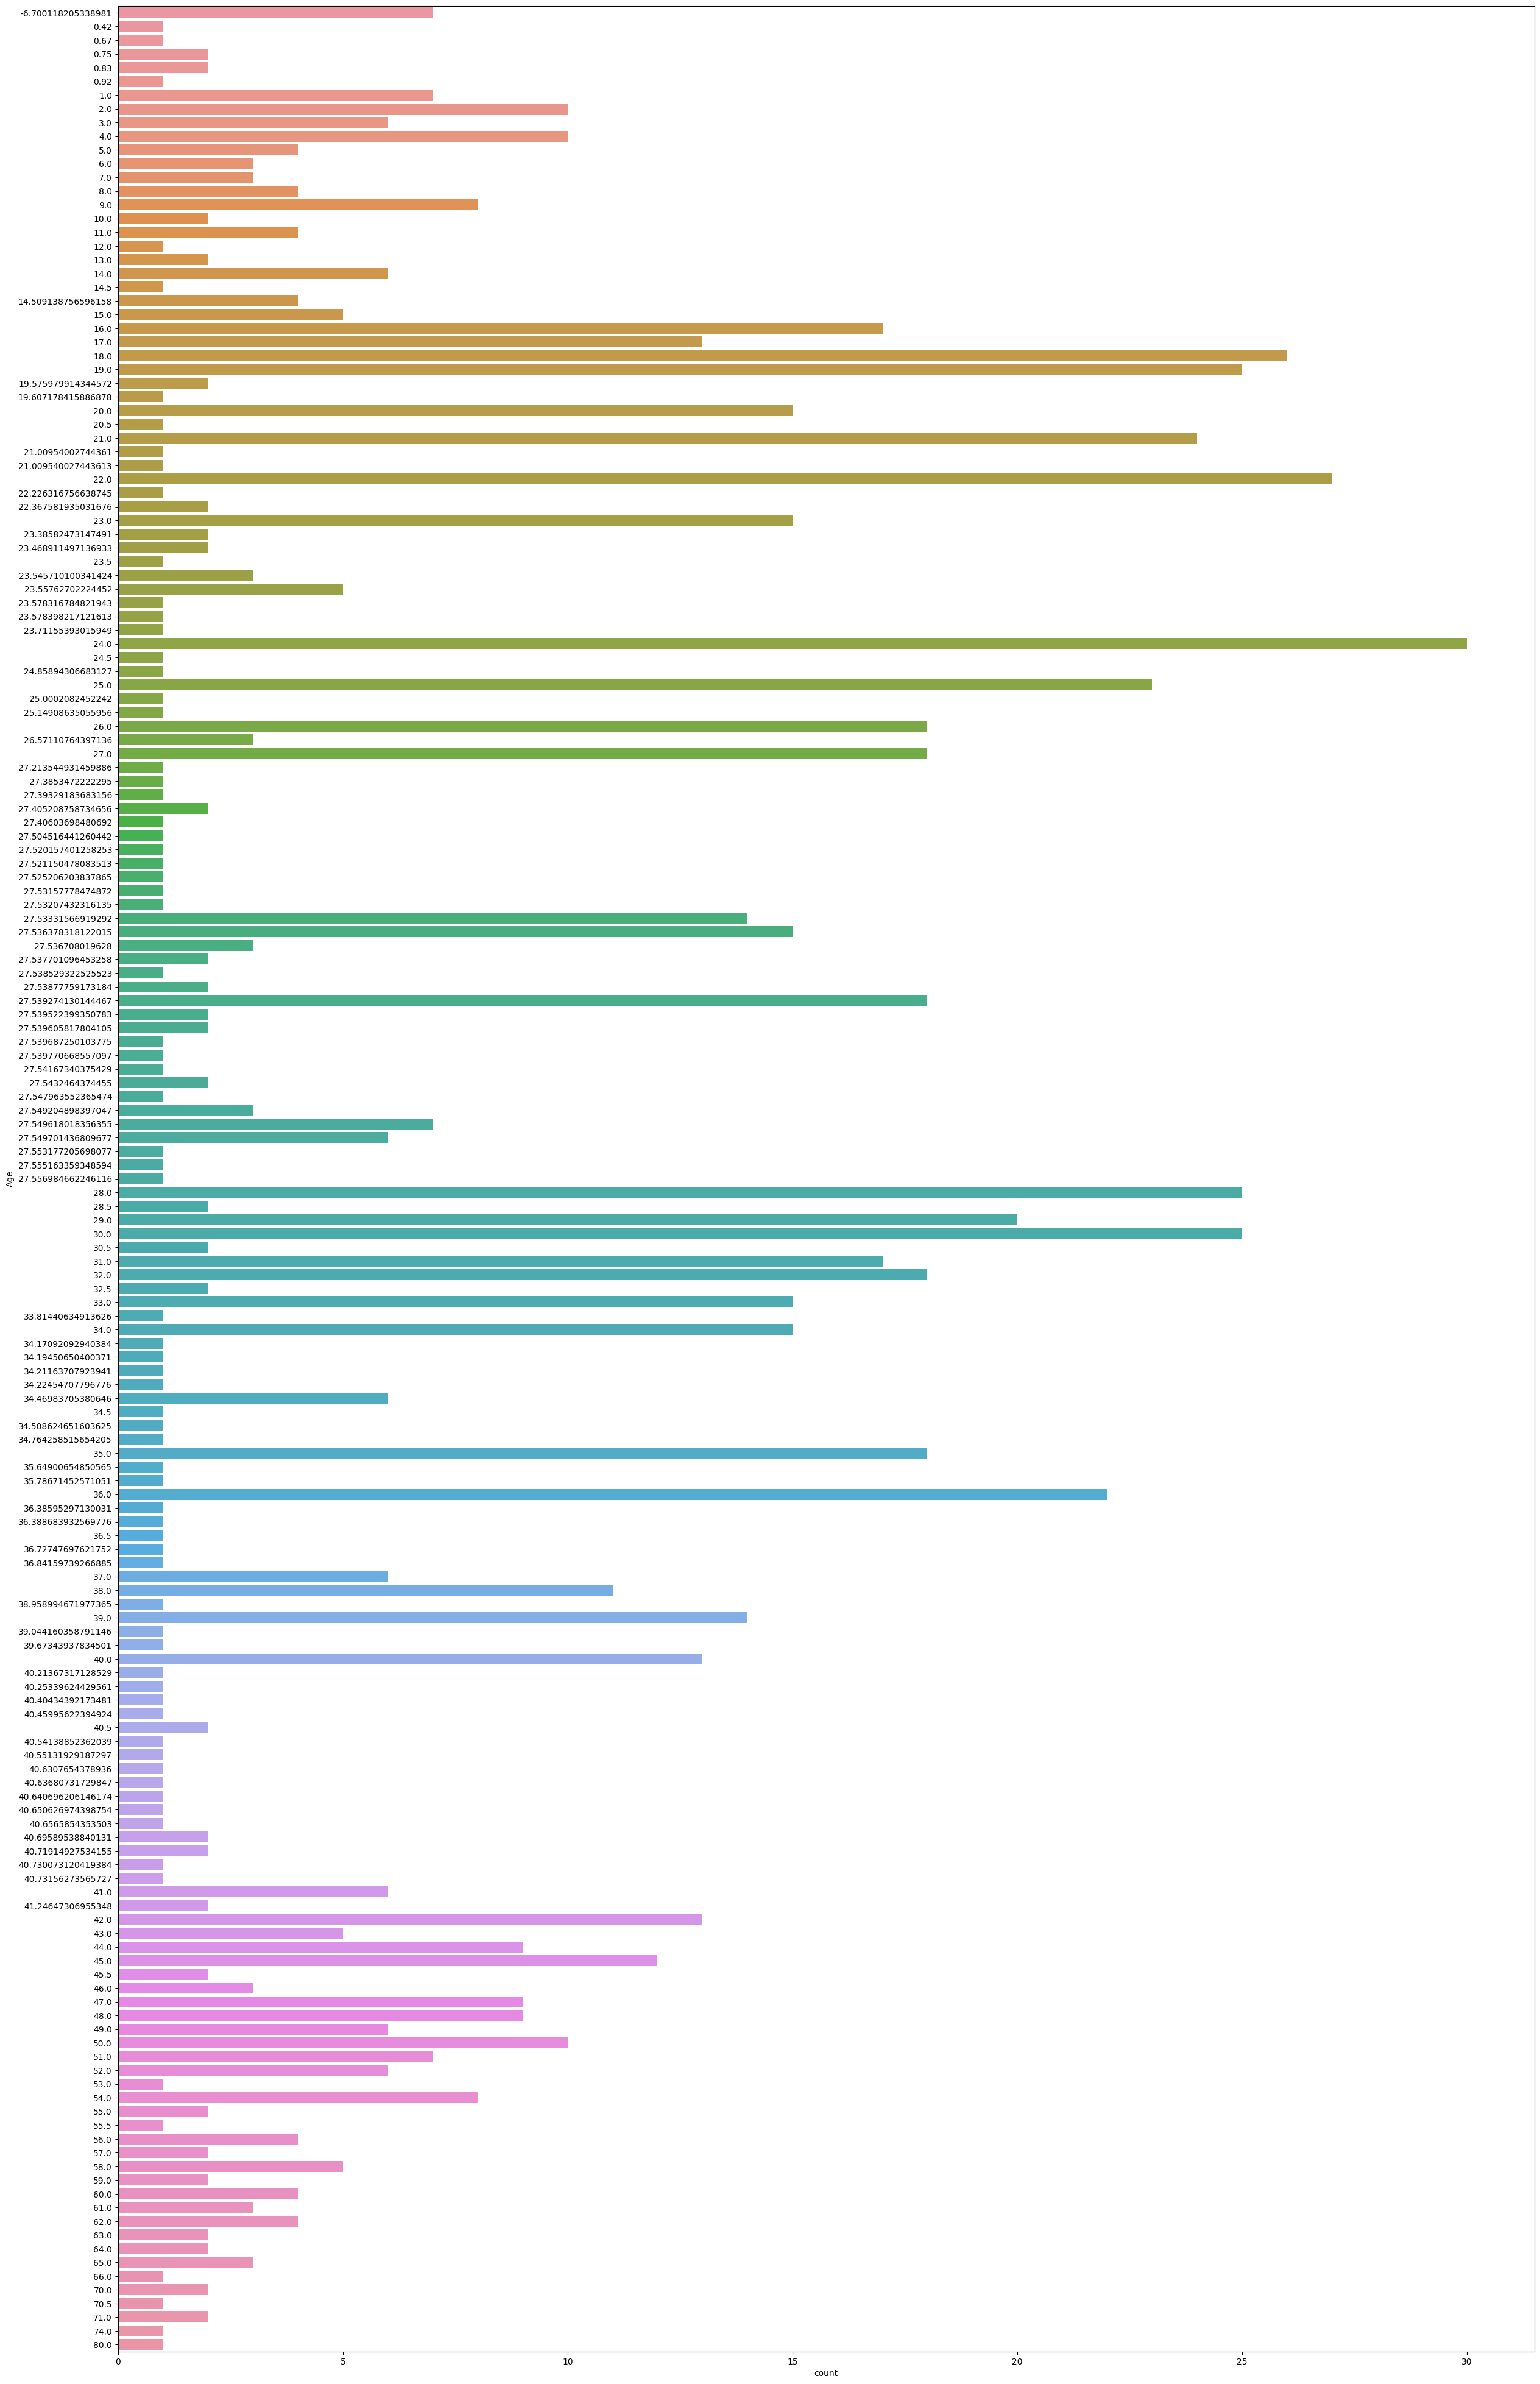

In [247]:
# Using countplot to visualize the age distribution of the titanic passengers
fig = plt.figure(figsize=(30,50))
sns.countplot(y='Age', data=titanic)
print(titanic.Age.value_counts())

The categories in the age column are enormous to analyse. As it is age, it would be much easier to have it in groups.
Below, the passengers will be categorized into age groups of 10 years intervals starting from 0-9.

C:\Users\onona\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


<Axes: xlabel='count', ylabel='Age_group'>

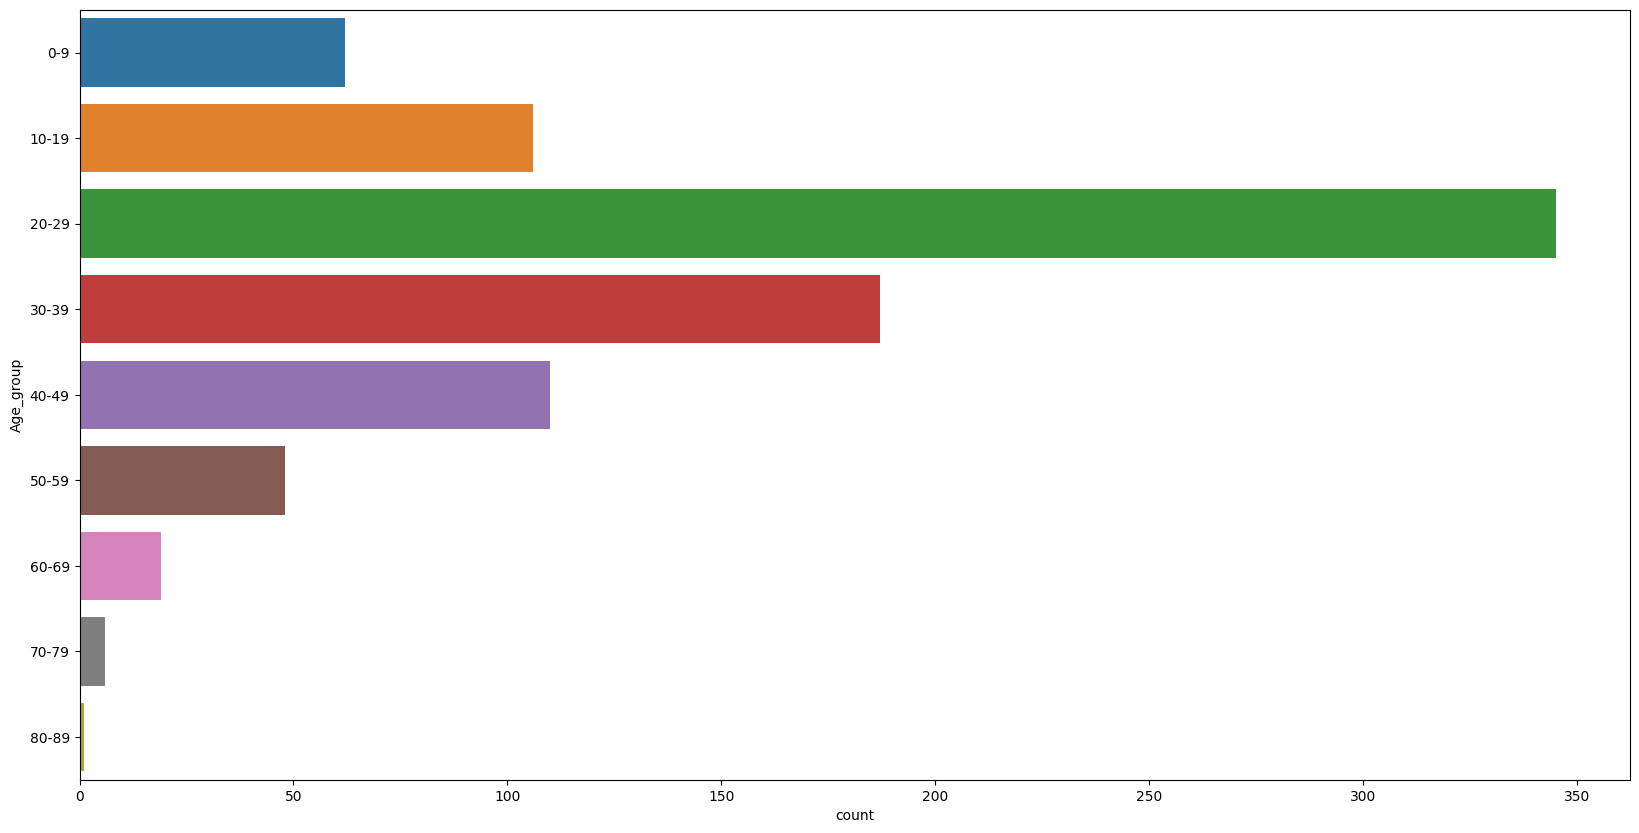

In [248]:
# Create a temporal dataframe
df_titanic = titanic

df_titanic['Age_group'] = pd.cut(df_titanic['Age'], [0,9,19,29,39,49,59,69,79,89],
                                 labels=['0-9','10-19','20-29','30-39','40-49','50-59',
                                         '60-69','70-79','80-89'])

# plot 

fig = plt.figure(figsize=(20,10))
sns.countplot(y=df_titanic['Age_group'], data=df_titanic)

The age categories are now easier to read and analyse. It is evident that majority of the titanic passengers were between the ages 10-49

**TO DETERMINE THE MOST IMPORTANT FACTOR IN DETERMINING SURVIVAL OF THE TITANIC INCIDENT**

*VISUALIZE THE RELATIONSHIP BETWEEN EACH FEATURE IN THE DATASET AND SURVIVAL USING PLOTS*

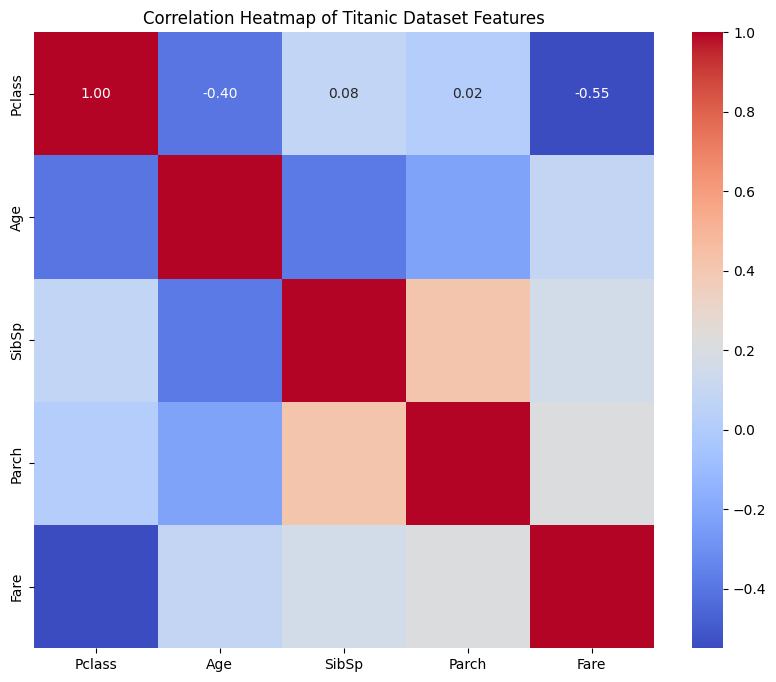

In [252]:

# Let's first ensure that 'Survived' is in numeric format (0 for not survived, 1 for survived)
df_titanic['Survived'] = df_titanic['Survived'].astype(int)

# Selecting numerical features only
numerical_features = df_titanic.select_dtypes(include=['int64', 'float64'])

# Calculating correlation matrix
correlation_matrix = numerical_features.corr()

# Plotting heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Titanic Dataset Features')
plt.show()


The heatmap above stipulates that the most important factor in determining survival rate is Passenger class.
this is futher ascertained below:

<Axes: xlabel='Pclass', ylabel='Survived'>

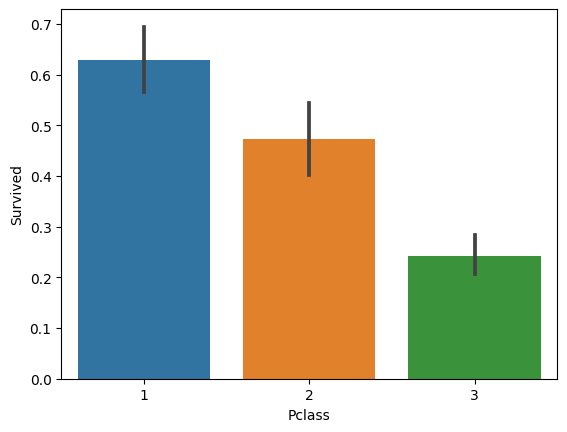

In [251]:
# survival rate by the Pclass feature
sns.barplot(x='Pclass', y='Survived', data=df_titanic)


The barplot above indicates that majority of the passengers who survived the titanic incident were of the 1st class, while least people who survived were of the 3rd class.

This answers the question of if what was postulated in the movie (the upper-class passengers being given preference on the lifeboats) was true. 

<Axes: xlabel='Sex', ylabel='Survived'>

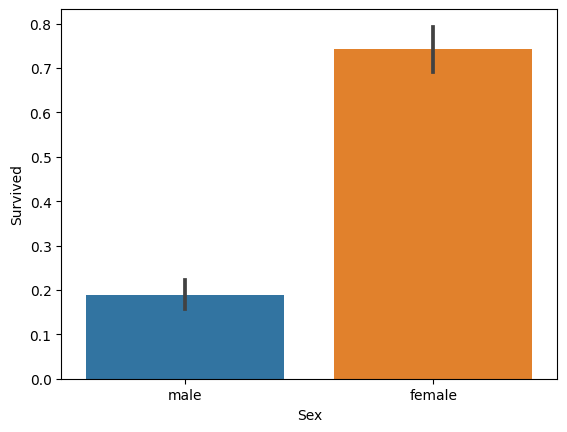

In [231]:
# survival rate by the sex feature
sns.barplot(x='Sex', y='Survived', data=df_titanic)


The barplot above shows that the number of women who survived the incident is nearly three times the number of males who survived. This goes to show that women wee given priority iver men.

C:\Users\onona\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


<Axes: xlabel='Age_group', ylabel='Survived'>

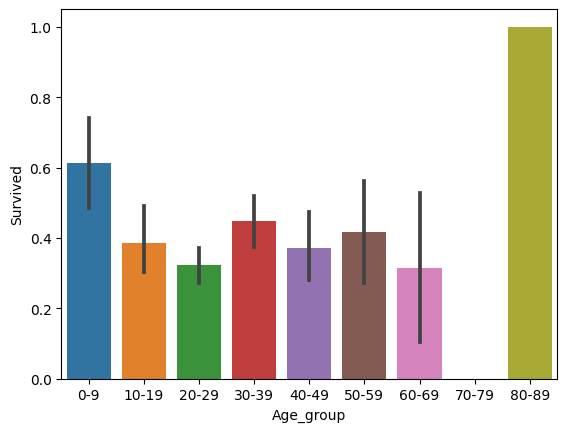

In [253]:
# survival rate by Age_group feature
sns.barplot(x='Age_group', y='Survived', data=df_titanic)

The barplot above indicates that passengers aged 0-9 years are 2nd group of passenger with the most survival rate, right after passengers aged 80-89.

This also goes to ptove that there was a "Women and Children first" rule during the incident.

<Axes: xlabel='Embarked', ylabel='Survived'>

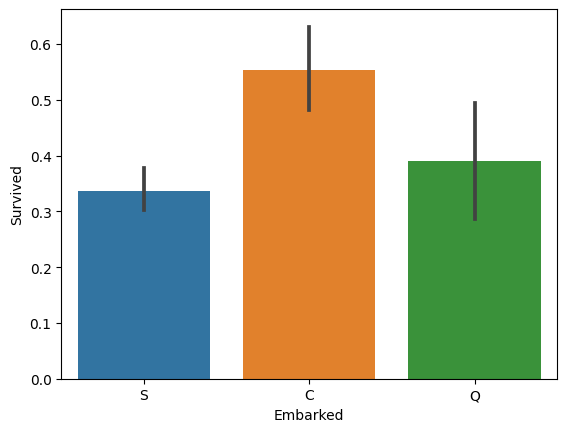

In [232]:
sns.barplot(x='Embarked', y='Survived', data=df_titanic)

A furhter analysis of the data as above shows (without relation to any feature) that more people who borded the titanic from the Cherbourg port survived the incidnet, compared to the Southampton and Queesntown ports.

This may open up a new investigation as to why this is so.